# RandomForest

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv

In [4]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'
df = pd.read_csv(open(cur_path+'/Final_Data.csv','rU'), encoding='utf-8')

In [5]:
df.shape

(8006399, 22)

In [6]:
df.dtypes

FlightNum              int64
Year                   int64
Day                    int64
Month                  int64
Week                   int64
Origin                object
Dest                  object
UniqueCarrier         object
ArrTime                int64
DepTime                int64
CRSArrTime             int64
CRSDepTime             int64
CRSElapsedTime         int64
ActualElapsedTime      int64
ArrDelayMinutes        int64
DepDelayMinutes        int64
OriginCityName        object
DestCityName          object
Flight_Status          int64
OriginVisibility     float64
OriginWind           float64
OriginPrecip         float64
dtype: object

In [7]:
# cols = df.columns.tolist()
# p = ['TaxiIn','Flight_Status','TaxiOut','WheelsOff','WheelsOn','FlightNum','Origin','Dest',
#      'Distance','DayOfWeek','Status','Quarter','OriginStateName','DestStateName',
#      'ArrivalDelayGroups','DepartureDelayGroups','UniqueCarrier','AirlineID']
# for i in p:
#     if i in cols:
#         cols.remove(i)

In [8]:
cols = df.columns.tolist()
cols.remove('Flight_Status')

### Cross Validation for splitting the data in train and test sets

In [9]:
X= df[cols]
y = df['Flight_Status']

In [10]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30,random_state=0)

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 

X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])

In [12]:
# Getting only the numerical columns

X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [11]:
X_train.head()

,FlightNum,Year,Day,Month,Week,ArrTime,DepTime,CRSArrTime,CRSDepTime,CRSElapsedTime,...,ArrDelayMinutes,DepDelayMinutes,OriginVisibility,OriginWind,OriginPrecip,carrier,origin,dest,ori_city,dest_city
5735510,1685,2017,25,4,2,1851,1727,1905,1730,95,...,0,0,10.0,9.0,0.0,3,16,185,14,178
3878461,1720,2016,16,11,3,1053,939,1041,937,124,...,12,2,10.0,7.0,0.0,3,16,171,14,147
3795517,3013,2016,22,10,6,1301,1131,1323,1138,105,...,0,0,6.0,7.0,0.0,8,250,138,241,144
2166340,1483,2016,2,6,4,918,603,912,600,372,...,6,3,10.0,7.0,0.0,9,81,227,173,215
7992256,577,2017,3,9,7,1117,841,1149,851,358,...,0,0,10.0,5.0,0.0,2,87,227,81,215


In [33]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth =15,random_state=0)
model = model.fit(X_train, y_train)

In [34]:
# Caluculating the accuracy of the model

accuracy = model.score(X_train, y_train)
print(accuracy)

1.0


In [35]:
# Run the model on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
# Generating Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1868976       0]
 [      0  532944]]


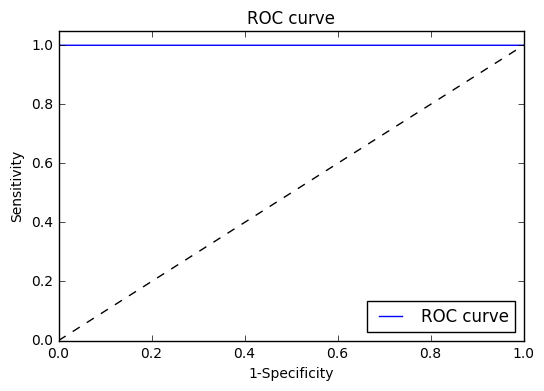

In [32]:
# ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Predict the values for test and train using the model
y_test_predicted = model.predict(X_test)
y_train_predicted= model.predict(X_train)

In [27]:
# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

MAE_train: 0.0610624109752
MAE_test: 0.0613055389022
RMS_train: 0.0610624109752
RMS_test: 0.0613055389022


# TRIALS

# 1

In [13]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth =5,random_state=0)
model1 = model1.fit(X_train, y_train)

accuracy = model1.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model1.predict(X_test)
y_train_predicted= model1.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.966681648731
[[1868976       0]
 [  80112  452832]]
MAE_train: 0.0333183512687
MAE_test: 0.0333533173461
RMS_train: 0.0333183512687
RMS_test: 0.0333533173461


# 2

In [14]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(max_depth =10,random_state=0)
model2 = model2.fit(X_train, y_train)

accuracy = model2.score(X_train, y_train)
print('Accuracy: ',accuracy)

# Run the model on the test set
y_pred = model2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Caluclate the rms and mae values
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_predicted = model2.predict(X_test)
y_train_predicted= model2.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)
print('MAE_train:' ,mae_train)
print('MAE_test:',mae_test)
print('RMS_train:',rms_train)
print('RMS_test:',rms_test)

Accuracy:  0.999994290281
[[1868976       0]
 [     15  532929]]
MAE_train: 5.70971895871e-06
MAE_test: 6.2450039968e-06
RMS_train: 5.70971895871e-06
RMS_test: 6.2450039968e-06
